<a href="https://colab.research.google.com/github/AleyMohammed/Heart-Disease-prediction/blob/main/Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# ***Heart Disease Prediction System :-***  ♥
***This project is a heart disease prediction system that preprocesses data, trains a Support Vector Machine (SVM) model,It includes data cleaning, outlier removal, model training, and serialization using pickle.***


![alt text here](https://insightimi.wordpress.com/wp-content/uploads/2022/12/68747470733a2f2f7777772e696d70657269616c2e61632e756b2f496d61676543726f70546f6f6c54342f696d616765546f6f6c2f75706c6f616465642d696d616765732f68656172742d696c6c757374726174696f6e2d2d746f6a70.jpg)

## **Import Required Libraries**
---

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_csv('heart_disease_data.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [12]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
for uni in data.columns :

   df = data[uni].unique() # label feature --> Y
   print(f'{uni} = {df}')

age = [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex = [1 0]
cp = [3 2 1 0]
trestbps = [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol = [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs =

# **Preprocessing :-**


1.  *Checking and Handling Missing*
2.  *Duplicate values*

---
---

In [14]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [15]:
data.duplicated().sum()

1

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.duplicated().sum()

0

## **Removing Outliers from Data**

---
---




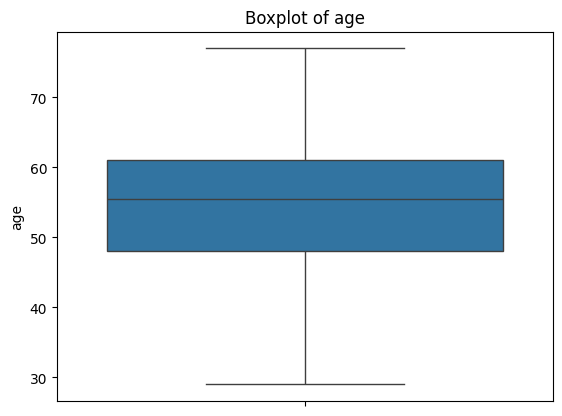

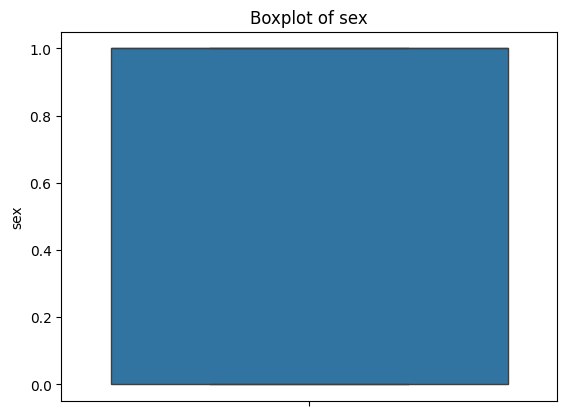

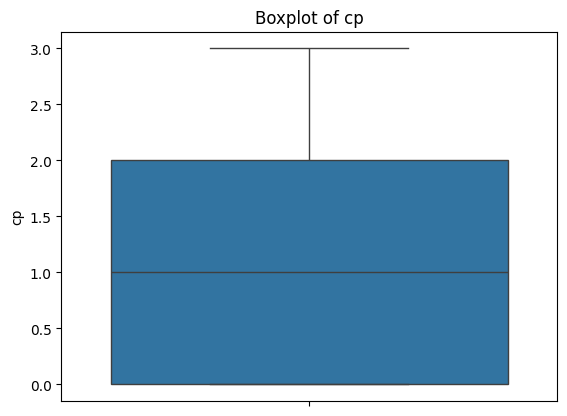

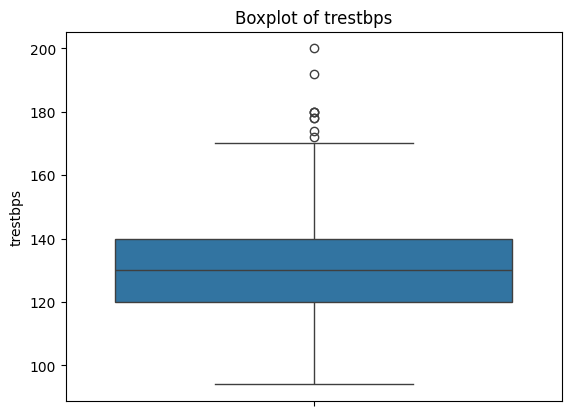

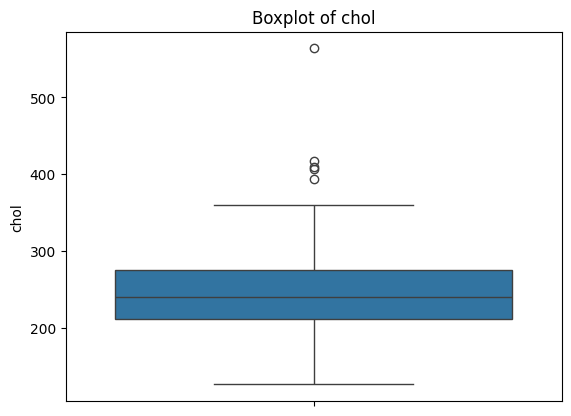

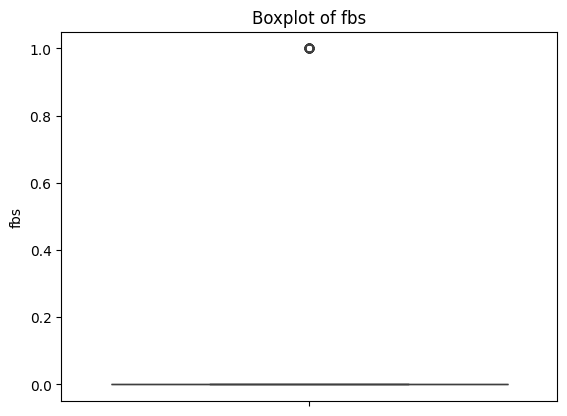

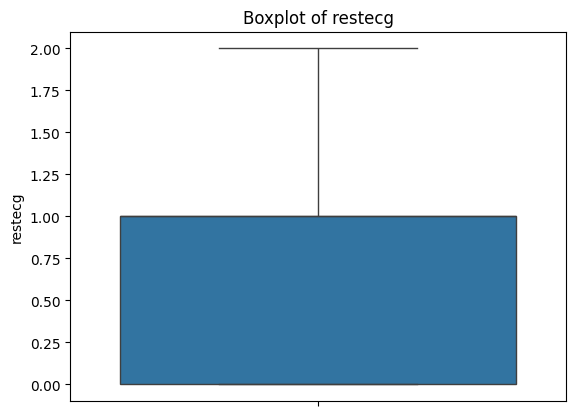

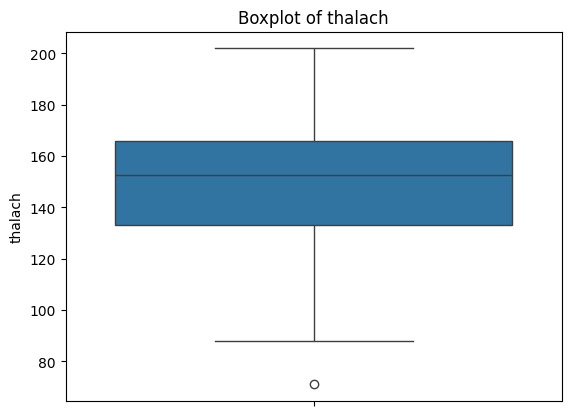

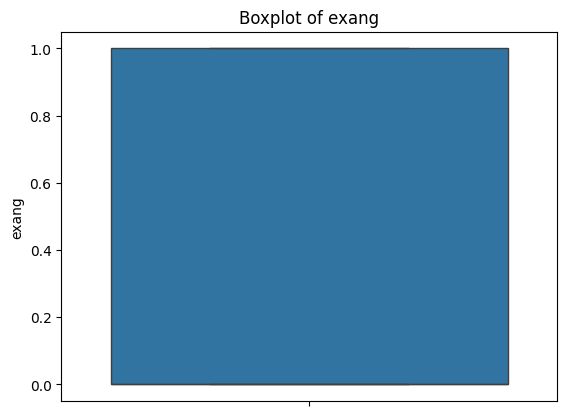

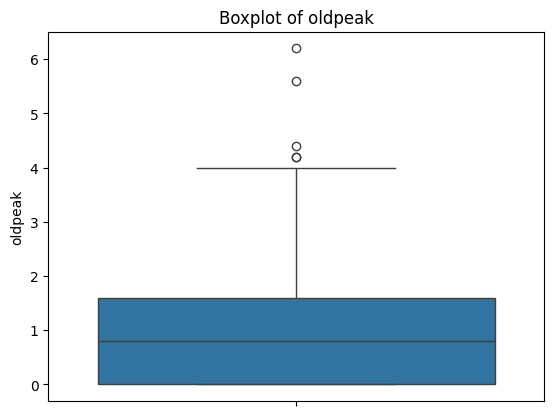

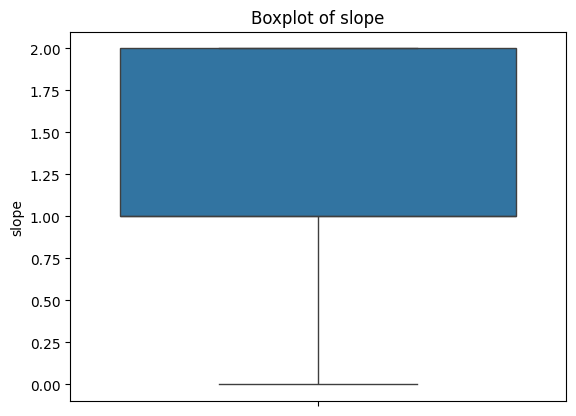

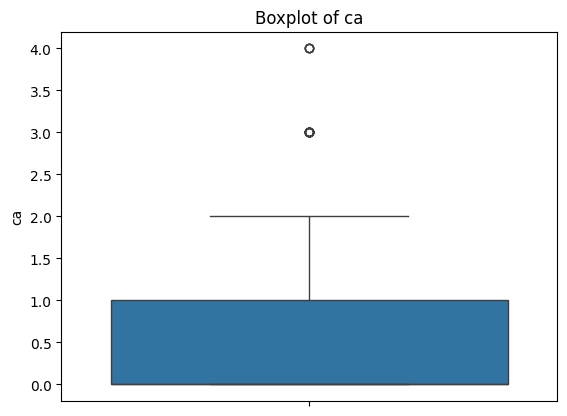

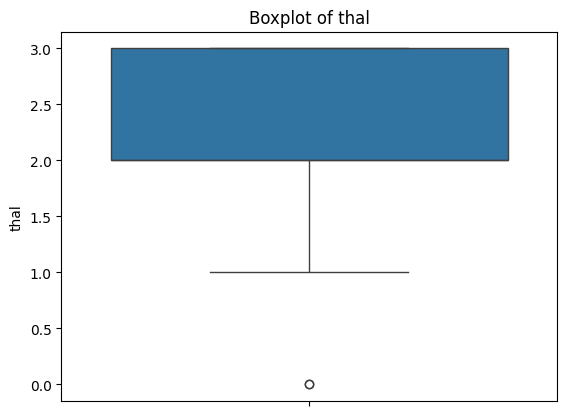

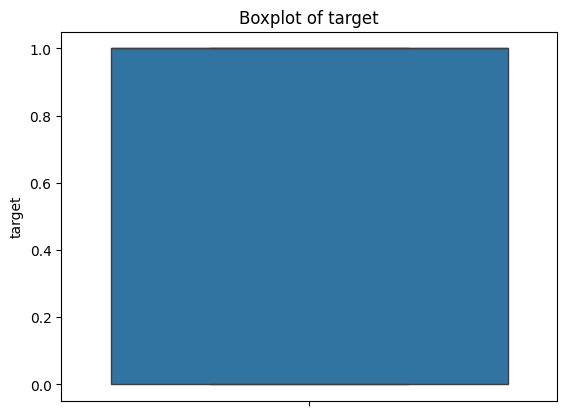

In [18]:

for out in data.columns:
    sns.boxplot(data[out])
    plt.title(f"Boxplot of {out}")
    plt.show()


In [19]:
s = data['trestbps'] #choose the column
q1 = s.quantile(0.25) #lower quartile
q3 = s.quantile(0.75) #highier quartile
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
x=(s < iqr_lower) | (s > iqr_upper)
print(x)
print(s[0])
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)]) #finding outliers
print(outliers1)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: trestbps, Length: 302, dtype: bool
145
{8: 172, 101: 178, 110: 180, 203: 180, 223: 200, 241: 174, 248: 192, 260: 178, 266: 180}


In [20]:
data.drop(outliers1,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='trestbps'>

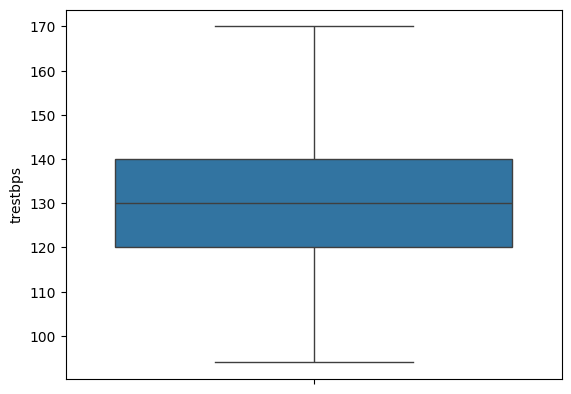

In [21]:
sns.boxplot(data['trestbps'])

In [22]:
s = data['chol'] #choose the column
q1 = s.quantile(0.25) #lower quartile
q3 = s.quantile(0.75) #highier quartile
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
x=(s < iqr_lower) | (s > iqr_upper)
print(x)
print(s[0])
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)]) #finding outliers
print(outliers2)

0      False
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300    False
301    False
302    False
Name: chol, Length: 293, dtype: bool
233
{28: 417, 85: 564, 96: 394, 220: 407, 246: 409}


In [23]:
data.drop(outliers2,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='chol'>

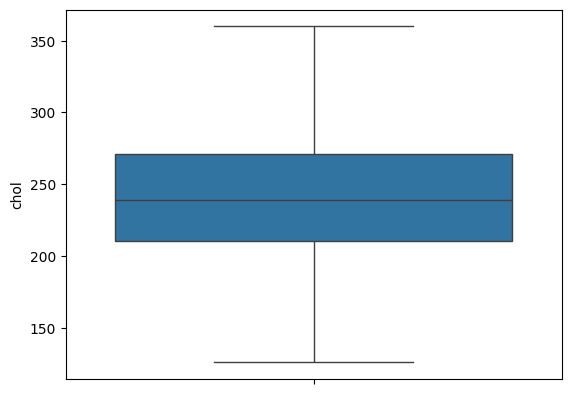

In [24]:
sns.boxplot(data['chol'])

In [25]:
s = data['fbs'] #choose the column
q1 = s.quantile(0.25) #lower quartile
q3 = s.quantile(0.75) #highier quartile
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
x=(s < iqr_lower) | (s > iqr_upper)
print(x)
print(s[0])
outliers3 = dict(s[(s < iqr_lower) | (s > iqr_upper)]) #finding outliers
print(outliers3)

0       True
1      False
2      False
3      False
4      False
       ...  
298    False
299    False
300     True
301    False
302    False
Name: fbs, Length: 288, dtype: bool
1
{0: 1, 14: 1, 23: 1, 26: 1, 29: 1, 36: 1, 60: 1, 64: 1, 76: 1, 78: 1, 83: 1, 87: 1, 90: 1, 93: 1, 97: 1, 99: 1, 103: 1, 106: 1, 111: 1, 136: 1, 137: 1, 169: 1, 170: 1, 176: 1, 197: 1, 214: 1, 215: 1, 217: 1, 219: 1, 222: 1, 231: 1, 251: 1, 252: 1, 269: 1, 278: 1, 281: 1, 282: 1, 292: 1, 297: 1, 300: 1}


In [26]:
data.drop(outliers3,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='fbs'>

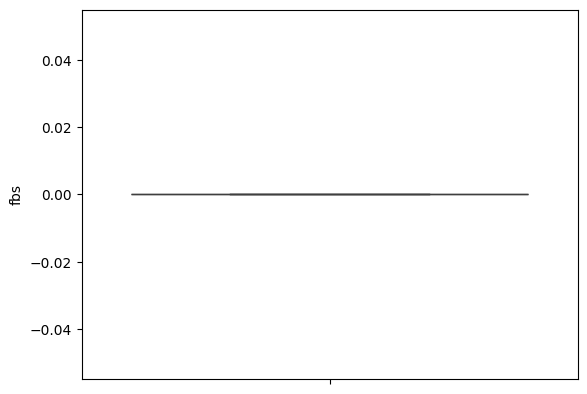

In [27]:
sns.boxplot(data['fbs'])

In [28]:
s = data['thalach']  # choose the column

# Calculate the quartiles and IQR
q1 = s.quantile(0.25)  # lower quartile
q3 = s.quantile(0.75)  # higher quartile
iqr = q3 - q1  # Interquartile range

# Determine the lower and upper bounds for outliers
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

# Find outliers
x = (s < iqr_lower) | (s > iqr_upper)
print(x)

# Access the first value of the Series using iloc
print(s.iloc[0])  # Access the first value correctly

# Find and print the outliers as a dictionary
outliers100 = s[x].to_dict()  # Finding outliers and converting to dictionary
print(outliers100)


1      False
2      False
3      False
4      False
5      False
       ...  
296    False
298    False
299    False
301    False
302    False
Name: thalach, Length: 248, dtype: bool
187
{272: 71}


In [29]:
data.drop(outliers100,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='thalach'>

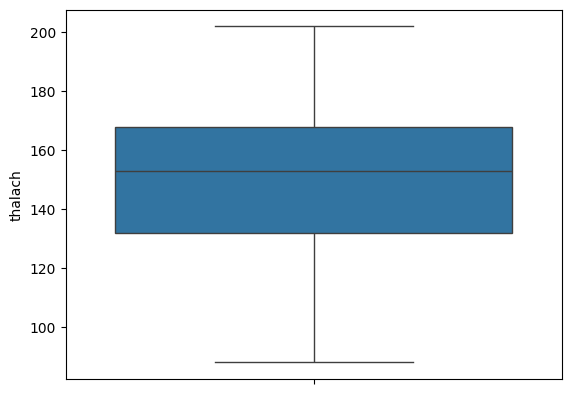

In [30]:
sns.boxplot(data['thalach'])

In [31]:
s = data['oldpeak'] #choose the column
# Calculate the quartiles and IQR
q1 = s.quantile(0.25)  # lower quartile
q3 = s.quantile(0.75)  # higher quartile
iqr = q3 - q1  # Interquartile range

# Determine the lower and upper bounds for outliers
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

# Find outliers
x = (s < iqr_lower) | (s > iqr_upper)
print(x)

# Access the first value of the Series using iloc
print(s.iloc[0])  # Access the first value correctly

# Find and print the outliers as a dictionary
outliers5 = s[x].to_dict()  # Finding outliers and converting to dictionary
print(outliers5)


1      False
2      False
3      False
4      False
5      False
       ...  
296    False
298    False
299    False
301    False
302    False
Name: oldpeak, Length: 247, dtype: bool
3.5
{204: 6.2, 221: 5.6, 250: 4.2, 291: 4.4}


In [32]:
data.drop(outliers5,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='oldpeak'>

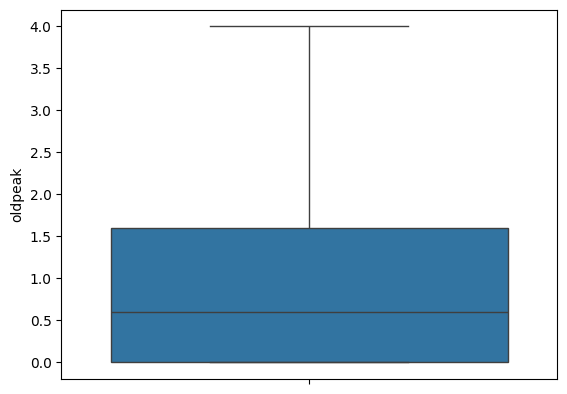

In [33]:
sns.boxplot(data['oldpeak'])

In [34]:

s = data['oldpeak'] #choose the column
# Calculate the quartiles and IQR
q1 = s.quantile(0.25)  # lower quartile
q3 = s.quantile(0.75)  # higher quartile
iqr = q3 - q1  # Interquartile range

# Determine the lower and upper bounds for outliers
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

# Find outliers
x = (s < iqr_lower) | (s > iqr_upper)
print(x)

# Access the first value of the Series using iloc
print(s.iloc[0])  # Access the first value correctly

# Find and print the outliers as a dictionary
outliers6= s[x].to_dict()  # Finding outliers and converting to dictionary
print(outliers6)

1      False
2      False
3      False
4      False
5      False
       ...  
296    False
298    False
299    False
301    False
302    False
Name: oldpeak, Length: 243, dtype: bool
3.5
{}


In [35]:
data.drop(outliers6,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='oldpeak'>

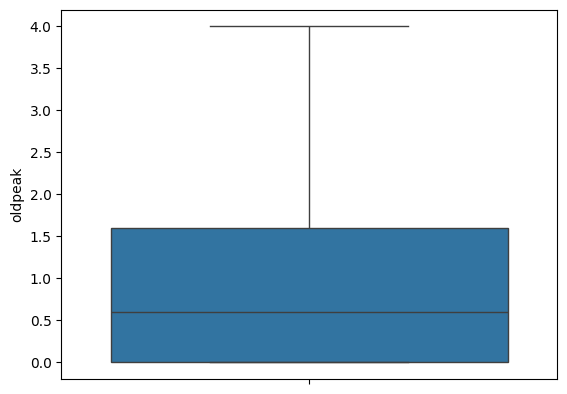

In [36]:
sns.boxplot(data['oldpeak'])

In [37]:
s = data['thal'] #choose the column
# Calculate the quartiles and IQR
q1 = s.quantile(0.25)  # lower quartile
q3 = s.quantile(0.75)  # higher quartile
iqr = q3 - q1  # Interquartile range

# Determine the lower and upper bounds for outliers
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr

# Find outliers
x = (s < iqr_lower) | (s > iqr_upper)
print(x)

# Access the first value of the Series using iloc
print(s.iloc[0])  # Access the first value correctly

# Find and print the outliers as a dictionary
outliers7= s[x].to_dict()  # Finding outliers and converting to dictionary
print(outliers7)

1      False
2      False
3      False
4      False
5      False
       ...  
296    False
298    False
299    False
301    False
302    False
Name: thal, Length: 243, dtype: bool
2
{48: 0}


In [38]:
data.drop(outliers7,inplace=True)
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<Axes: ylabel='thal'>

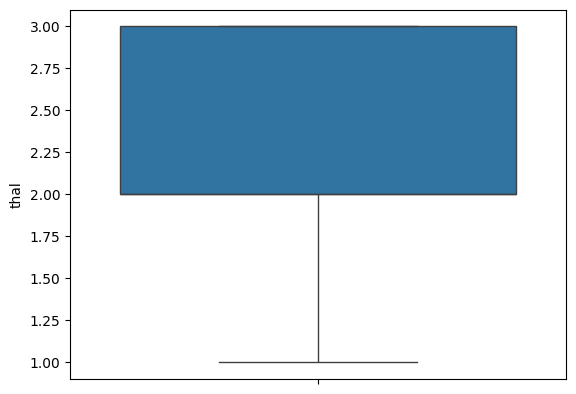

In [39]:
sns.boxplot(data['thal'])

In [40]:
from sklearn.model_selection import train_test_split,cross_val_score

## **Determining Features and Target**


*   **x --> split to train data .**
*   **y --> split test data .**


---
---



In [41]:
x = data.drop(columns = 'target',axis =1)
y = data.loc[:,'target'] # y = data['target']


In [42]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [43]:
y

,target
1,1
2,1
3,1
4,1
5,1
...,...
296,0
298,0
299,0
301,0



## **Performing Scaling** **(normilaztion by MinMax)**

---




In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
# fit just train --> x
mms = MinMaxScaler()
x = mms.fit_transform(x)

In [46]:
import pickle

## **Saving the fitted scaler to a file**
-----


In [47]:
with open('C:\\Users\\User\\Downloads\\Heart_Disease_Prediction_System\\scaler_one.sav','wb') as f :
   v1= pickle.dump(mms,f)
print(v1)

None


# **Split Data into train and Test**
---

In [48]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# **Initilize The Model**

---

In [49]:
from sklearn.svm import SVC

In [50]:
# data is linear
model=SVC(C=0.1)

# ***Cross validation***
---


In [51]:
scores = cross_val_score(model, x_train, y_train, cv=5) #
print("Cross-Validation Scores:", scores)
print("Mean Accuracy (Validation):", scores.mean())

Cross-Validation Scores: [0.79487179 0.87179487 0.66666667 0.78947368 0.73684211]
Mean Accuracy (Validation): 0.7719298245614035


# ***Train The Model***
---


In [52]:
model.fit(x_train,y_train)

SVC(C=0.1)

In [53]:
y_pred=model.predict(x_train)

## **Test The Model**
----

In [54]:
y_hat=model.predict(x_test)

## **Computing The Training and Testing Accuracy of The Model**
---

In [55]:
from sklearn.metrics import accuracy_score, classification_report

In [56]:
Training_Accuracy=accuracy_score(y_pred,y_train)
print("Training Accuracy",Training_Accuracy)

Testing_Accuracy=accuracy_score(y_hat,y_test)
print("Testing Accuracy",Testing_Accuracy)

Training Accuracy 0.8238341968911918
Testing Accuracy 0.8163265306122449


# ***Classification report***
---

In [57]:
report=classification_report(y_hat,y_test)
print(report)

              precision    recall  f1-score   support

           0       0.71      0.83      0.77        18
           1       0.89      0.81      0.85        31

    accuracy                           0.82        49
   macro avg       0.80      0.82      0.81        49
weighted avg       0.83      0.82      0.82        49



## **Save the trained model to a file**
---

In [58]:
with open('C:\\Users\\User\\Downloads\\Heart_Disease_Prediction_System\\trained_model_one.sav', 'wb') as f:
    v2= pickle.dump(model, f)
print(v2)

None



# **Load the model and scaler for prediction**
---

In [59]:
loaded_model = pickle.load(open('C:\\Users\\User\\Downloads\\Heart_Disease_Prediction_System\\trained_model_one.sav', 'rb'))
scaler = pickle.load(open('C:\\Users\\User\\Downloads\\Heart_Disease_Prediction_System\\scaler_one.sav', 'rb'))
print(loaded_model )

SVC(C=0.1)


In [60]:
print(scaler)

MinMaxScaler()


## **Computing The Mean Absolute Error (MAE) and Mean squared Error of The Model**
---

In [61]:
import sklearn.metrics as mc

In [62]:
mc.mean_absolute_error(y_test,y_hat)

0.1836734693877551

In [63]:
mc.mean_squared_error(y_test,y_hat)

0.1836734693877551

# **Example input data for prediction**
---

In [64]:
input_data = (48, 1, 0, 130, 256, 1, 0, 150, 1, 0, 2, 2, 3)
input_data_as_ndarray = np.asarray(input_data)
input_data_reshaped = input_data_as_ndarray.reshape(1, -1)

# Scale the input data
input_data_scaled = scaler.transform(input_data_reshaped)

# Predict with the loaded model
prediction = loaded_model.predict(input_data_scaled)
if prediction[0] == 0:
    print('The Person does not have heart disease')
else:
    print('The Person has heart disease')

The Person does not have heart disease
